In [ ]:
# Installation
!pip install rdkit-pypi

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CSV_file_path= '/content/...../Book1.csv'
data = pd.read_csv(CSV_file_path)

In [ ]:
data.head()

,IL No.,Name,SMILES,Experimental logEC50
0,1,(Ethoxymethyl)ethyldimethylammonium Chloride,[N+](C)(C)(CC)COCC.[Cl-],3.59
1,2,(Ethoxymethyl)ethyldimethylammonium Bis(triflu...,[N+](C)(C)(CC)COCC.[N-](S(=O)(=O)C(F)(F)F)S(=O...,3.80
2,3,"Tetraethylammonium Bis[1,2-benzenediolato(2-)-...",O1c4c(O[B-]12Oc3c(O2)cccc3)cccc4.CC[N+](CC)(CC)CC,1.17
3,4,Benzyldecyldimethylammonium Chloride,[N+](C)(C)(Cc1ccccc1)CCCCCCCCCC.[Cl-],0.64
4,5,(ethoxycarbonylmethyl)ethyldimethylammonium bi...,[N+](C)(C)(CC)CC(=O)OCC.[N-](S(=O)(=O)C(F)(F)F...,3.53


In [ ]:
smiles =data['SMILES']
toxicity =data['Experimental logEC50']

In [ ]:
# generate fingerprints
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in molecules]

Calculation of Tanimoto Similarity

In [ ]:
n = len(fingerprints)
similarity_matrix = np.zeros((n, n))

for i in range(n):
  for j in range(i, n):
    similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
    similarity_matrix[i,j] = similarity
    similarity_matrix[j,i] = similarity

# conversion into dataframe
similarity_df = pd.DataFrame(similarity_matrix, columns=smiles, index=smiles)

# Save and Sownload the similarity matrix
similarity_df.to_csv('tanimoto_similarity_matrix.csv')
files.download('tanimoto_similarity_matrix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CSV_file_path= '/content/drive/MyDrive/Safa_PhD/my_data/tanimoto_similarity_matrix.csv'
Similarity_data = pd.read_csv(CSV_file_path)

In [ ]:
similarity_df.to_excel('tanimoto_similarity_matrix.xlsx')
files.download('tanimoto_similarity_matrix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Similarity_data.head()

,SMILES,[N+](C)(C)(CC)COCC.[Cl-],[N+](C)(C)(CC)COCC.[N-](S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F,O1c4c(O[B-]12Oc3c(O2)cccc3)cccc4.CC[N+](CC)(CC)CC,[N+](C)(C)(Cc1ccccc1)CCCCCCCCCC.[Cl-],[N+](C)(C)(CC)CC(=O)OCC.[N-](S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F,[N+](C)(C)(C)CCCC.[N-](S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F,[N+](C)(C)(CC)CCOCC.[N-](S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F,[N+](C)(C)(CC)CCO.[N-](S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F,[N+](C)(C)(CC)CCOC.[N-](S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F,...,CCCCCCN1C=C[N+](=C1)C.[Cl-],CCN1C=C[N+](=C1)C.[Cl-],[B-](F)(F)(F)F.CCCC[N+]1=CN(C=C1)CC,CCCCN1C=C[N+](=C1)C.C(F)(F)(F)S(=O)(=O)[O-],CCCCCCN1C=C[N+](=C1)C.C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,CCN1C=C[N+](=C1)C.COS(=O)(=O)[O-],CCCCCCCC[N+]1=CC=C(C=C1)C.[Cl-],CC[N+]1=CC=CC=C1.[Cl-],CCCCCCCCCC[N+](C)(C)CC1=CC=CC=C1.[Cl-],[B-](F)(F)(F)F.CCCCN1C=C[N+](=C1)C
0,[N+](C)(C)(CC)COCC.[Cl-],1.000000,0.533333,0.181818,0.222222,0.250000,0.131579,0.333333,0.216216,0.236842,...,0.102564,0.121212,0.071429,0.062500,0.057692,0.095238,0.142857,0.142857,0.222222,0.073171
1,[N+](C)(C)(CC)COCC.[N-](S(=O)(=O)C(F)(F)F)S(=O...,0.533333,1.000000,0.133333,0.142857,0.589744,0.486486,0.714286,0.583333,0.594595,...,0.057692,0.065217,0.075472,0.188679,0.313725,0.137255,0.083333,0.073171,0.142857,0.076923
2,O1c4c(O[B-]12Oc3c(O2)cccc3)cccc4.CC[N+](CC)(CC)CC,0.181818,0.133333,1.000000,0.225000,0.100000,0.090909,0.104167,0.111111,0.106383,...,0.116279,0.135135,0.111111,0.098039,0.090909,0.108696,0.184211,0.193548,0.225000,0.113636
3,[N+](C)(C)(Cc1ccccc1)CCCCCCCCCC.[Cl-],0.222222,0.142857,0.225000,1.000000,0.111111,0.204545,0.137255,0.145833,0.140000,...,0.232558,0.119048,0.145833,0.129630,0.160714,0.076923,0.315789,0.200000,1.000000,0.148936
4,[N+](C)(C)(CC)CC(=O)OCC.[N-](S(=O)(=O)C(F)(F)F...,0.250000,0.589744,0.100000,0.111111,1.000000,0.439024,0.560976,0.564103,0.536585,...,0.053571,0.060000,0.070175,0.175439,0.290909,0.127273,0.076923,0.066667,0.111111,0.071429


The general similarity of the molecules, in terms of percentage, is approximately 19.21%. This means that, on average, the molecules in dataset share about 19.21% similarity with each other based on the Tanimoto similarity index.
Tanimoto Similarity Range
**0 to 0.2:** Very low similarity. Molecules share very few common features.

**0.2 to 0.4:** Low similarity. Molecules have some common features but are generally different.

**0.4 to 0.6:** Moderate similarity. Molecules share several common features and may have similar properties.

**0.6 to 0.8:** High similarity. Molecules are quite similar and likely have similar properties.

**0.8 to 1.0:** Very high similarity. Molecules are very similar or identical.

Interpretation of 19.21%:
It stands for 19.21% (or 0.1921) falls into the ***low similarity*** range.
It indicates that, on average, the molecules in my dataset do not share many common features and are relatively diverse.

In this study our goal is to to have a diverse set of molecules, a low similarity percentage is generally desirable as it implies a wide variety of chemical structures. So, 19.21% is good on this purpose of studying.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


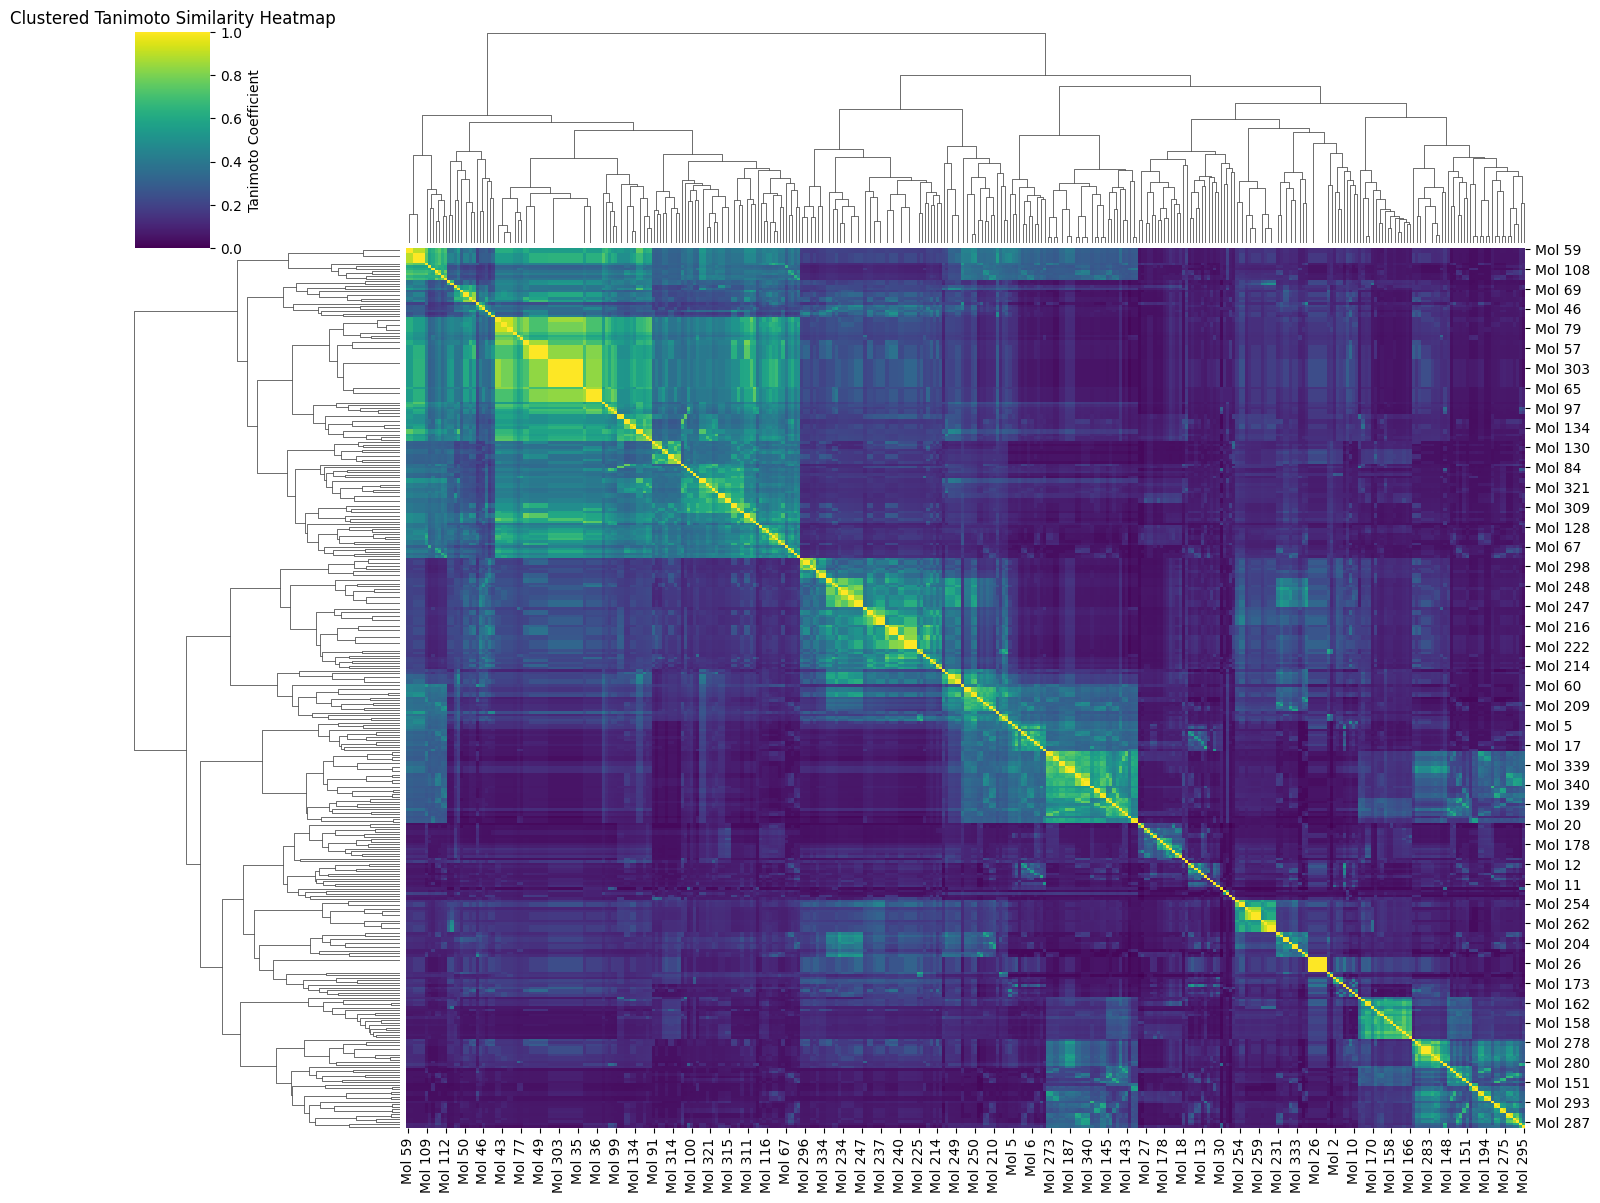

In [ ]:
similarity_matrix = Similarity_data.set_index('SMILES')

# Simplify molecule labels for clarity
similarity_matrix.index = [f"Mol {i}" for i in range(len(similarity_matrix))]
similarity_matrix.columns = [f"Mol {i}" for i in range(len(similarity_matrix))]

# Perform hierarchical clustering
linkage_matrix = linkage(squareform(1 - similarity_matrix), method='ward')

# Reorder the matrix based on clustering
sns.clustermap(similarity_matrix, cmap='viridis', figsize=(15, 12), cbar_kws={'label': 'Tanimoto Coefficient'})
plt.title("Clustered Tanimoto Similarity Heatmap")
plt.show()